# DIVIDE Y VENCERAS

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colorbar import contour

### Definimos las coordenadas de las rectas

In [4]:
rects=[(3,13,9),(1,11,5),(19,18,22),(3,6,7),(16,3,25),(12,7,16)]

### Definimos funcion para imprimir las rectas

In [5]:
def showRect(recta):
  g,h,d = recta
  points = [(g,0),(g,h),(d,h),(d,0),(g,0)]
  x,y = zip(*points)
  plt.plot(x,y)

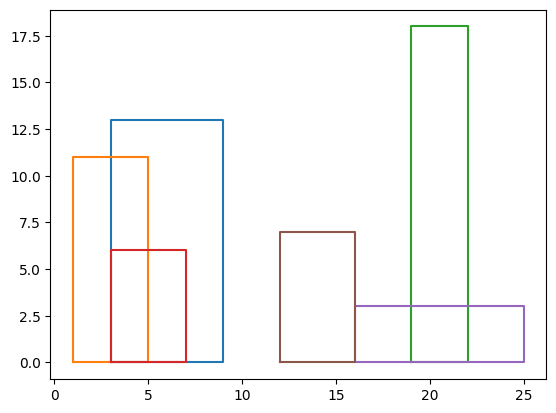

In [6]:
for rect in rects:
  showRect(rect)
plt.show()

## Empleamos el algoritmo Divide y Venceras

### Creamos una funcion que recibe las coordenadas y las convierte en una nueva ----> (x,y,z) -> [(g,h),(d,0)]

In [7]:
def getContour(recta):
    g,h,d = recta
    return [(g,h),(d,0)]

### Creamos una funcion que usa la nueva coordinated que sirve para imprimir el contorno de la figura original

In [8]:
def showContour(contour):
  temp=[(0,0)]
  # Este FOR recoge las coordenadas y las aplica a las variables a,b ----->  a = (g,h) & b = (d,0)
  for a,b in contour:
    temp.append((a,temp[-1][1]))
    temp.append((a,b))
  # zip(*tmp) -> Empareja en pares los elementos de la misma posicion
  x,y = zip(*temp)
  plt.plot(x,y)

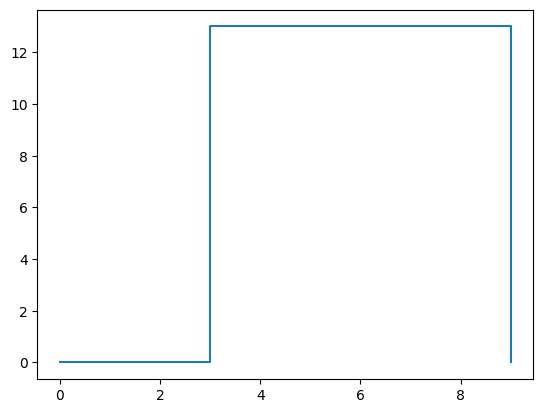

In [9]:
showContour(getContour(rects[0]))

### Hacemos uso de la funcion que halla bordes en nuestra lista objetivo

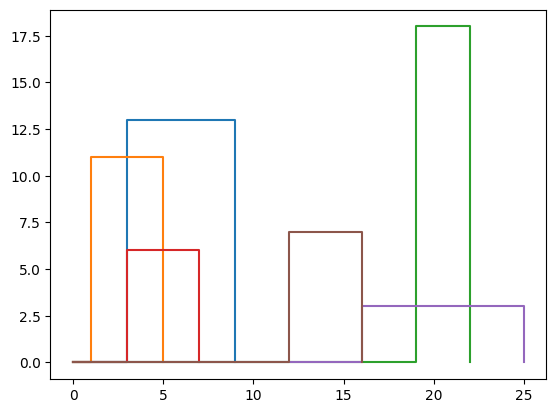

In [10]:
for rect in rects:
  showContour(getContour(rect))

## Creamos una funcion que verifica los contornos que se van a añadir a la lista contour

In [11]:
def add(contour,x,y):
  if len(contour) > 1:
    if contour[-1][0] == x:
      contour[-1] = (x,max(y,contour[-1][1]))
      return
    elif contour [-1][1] ==y:
      return
  contour.append((x,y))

### Creamos una funcion que une(merge) dos coordenadas pares -> [(g,h),(d,0)] x 2

In [12]:
def merge(c1,c2):
  n1 = len(c1)
  n2 = len(c2)
  i1,i2 = 0,0
  y1,y2 = 0,0
  contour = []
  while i1 < n1 or i2 < n2:
    if i1 >= n1 or i2 < n2 and c2 [i2][0] <= c1[i1][0]:
      x,y2 = c2[i2]
      i2 += 1
    else:
      x,y1 = c1[i1]
      i1 += 1
    y = max(y1,y2)
    add(contour,x,y)
  return contour

### Se crea la funcion en base a Divide y Venceras para resolver el problema ---> Este divide el problema en dos mitades y asi sigue recursivamente

In [13]:
def skyline(rectas, i, j):
  if i == j:
    return getContour(rectas[i])
  mid = (i+j) // 2
  c1 = skyline(rectas, i, mid)
  c2 = skyline(rectas, mid + 1, j)
  return merge(c1,c2)

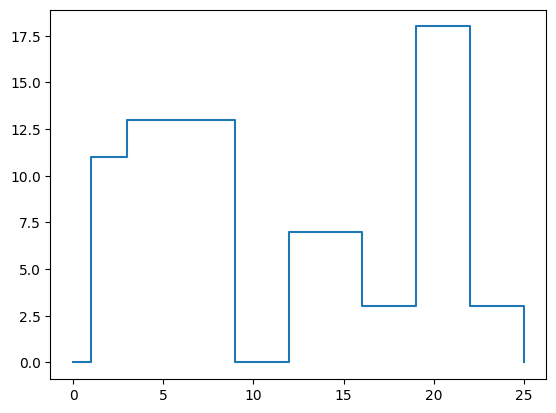

In [14]:
contorno = skyline (rects, 0, len(rects) - 1)
showContour(contorno)